In [2]:
import numpy as np
import matplotlib.pyplot as plt
from marvin.tools import Maps
from photutils import CircularAperture
from photutils import aperture_photometry

In [3]:
# Documentation: https://sdss-marvin.readthedocs.io/en/stable/index.html
# Take 7443-12703 as an example
maps = Maps('7443-12703')

In [4]:
# Take Dn4000 as an example
dn4000 = maps.specindex_dn4000

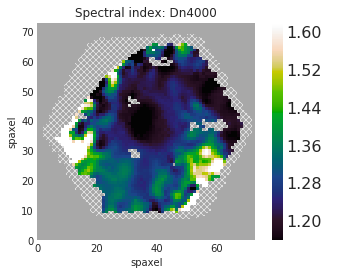

In [5]:
# Plot the map
dn4000.plot()
plt.show()

### Set the data

In [6]:
# Convert dn4000 into a numpy array
data = dn4000.value
# Convert the type of the mask to Boolean
mask = dn4000.mask.astype(bool)
# Mask the array
masked_data = np.ma.array(data, mask=mask)

In [7]:
def get_data_mask(map_data):
    data = map_data.value
    mask = map_data.mask.astype(bool)
    masked_data = np.ma.array(data, mask=mask)
    return data, mask, masked_data

### Get the index of the center

In [8]:
cen = int(data.shape[0] / 2)
cen_pos = [[cen, cen]]

In [9]:
cen_pos

[[37, 37]]

In [10]:
def get_center(dat):
    cen = int(dat.shape[0] / 2)
    cen_pos = [[cen, cen]]
    return cen_pos

### Sum the values within a circle with a radius of 15 pixels

In [11]:
# Documentation: https://photutils.readthedocs.io/en/stable/aperture.html
aper = CircularAperture(cen_pos, r=15)
phot_table = aperture_photometry(masked_data, aper, method='center')

In [12]:
phot_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,37.0,37.0,839.5739899999999


In [13]:
# Get the value from the table
sum_value = phot_table['aperture_sum'][0]
print(sum_value)

839.5739899999999


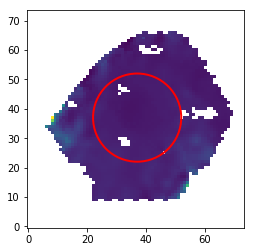

In [14]:
ax = plt.gca()
ax.imshow(masked_data, origin='lower')
aper.plot(color='red', lw=2, ax=ax)
plt.show()

In [15]:
def get_the_sum(r, masked_data, cen_pos, method='center', plot=True):
    aper = CircularAperture(cen_pos, r=r)
    phot_table = aperture_photometry(masked_data, aper, method=method)
    sum_value = phot_table['aperture_sum'][0]
    # Plot
    if plot:
        ax = plt.gca()
        im = ax.imshow(masked_data, origin='lower')
        aper.plot(color='red', lw=2, ax=ax)
        plt.colorbar(im)
        plt.show()
    return sum_value

### Count the valid spaxels within a circle with a radius of 15 pixels

In [16]:
aper = CircularAperture(cen_pos, r=15)
# mask: 1 for invalid, 0 for valid
# Use "~" to convert 1 to stand for valid, which makes the counting easier.
phot_table_count = aperture_photometry(~mask, aper, method='center')

In [17]:
phot_table_count

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,37.0,37.0,680.0


In [18]:
# Get the value from the table
count_value = phot_table_count['aperture_sum'][0]
print(count_value)

680.0


In [19]:
def get_the_count(r, mask, cen_pos, method='center'):
    aper = CircularAperture(cen_pos, r=r)
    phot_table_count = aperture_photometry(~mask, aper, method='center')
    count_value = phot_table_count['aperture_sum'][0]
    return count_value

### Get the mean value of these spaxels

In [20]:
mean_value = sum_value / count_value

In [21]:
mean_value

1.234667632352941

### Put all the things together with functions

In [22]:
get_the_count(10, mask, cen_pos, method='center')

295.0

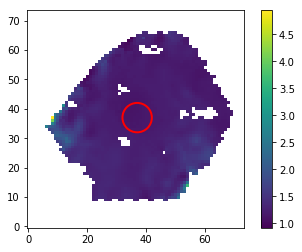

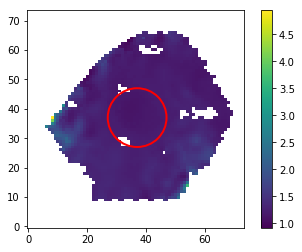

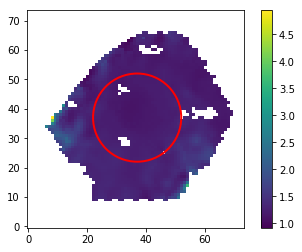

1.1644915942028986
1.2012677966101695
1.234667632352941


In [23]:
def get_mean_value(radius, map_data):
    data, mask, masked_data = get_data_mask(map_data)
    cen_pos = get_center(data)
    sum_value = get_the_sum(radius, masked_data, cen_pos, method='center', plot=True)
    count_value = get_the_count(radius, mask, cen_pos, method='center')
    mean_value = sum_value / count_value
    return mean_value

mean_value_5 = get_mean_value(radius=5, map_data=dn4000)
mean_value_10 = get_mean_value(radius=10, map_data=dn4000)
mean_value_15 = get_mean_value(radius=15, map_data=dn4000)

print(mean_value_5)
print(mean_value_10)
print(mean_value_15)